In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
predictions_template = pd.DataFrame(
    {
        "consumer": [0,0,0],
        "product": [0, 1, 2], 
        "probability": [0.32, 0.71, 0.04]
    }
)
predictions_template

,consumer,product,probability
0,0,0,0.32
1,0,1,0.71
2,0,2,0.04


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head(3)

,customer_id,product_id,price,week
0,0,5,7.03,1
1,0,39,4.71,1
2,0,53,7.61,1


In [5]:
df.shape

(307838, 4)

In [34]:
len(df) - len(df.drop_duplicates())

0

In [6]:
df.customer_id.unique().max()

1999

In [7]:
df.week.max()

49

In [10]:
# Do prices change? Sure, they do
np.mean([df[df.product_id == i].price.std() != 0 for i in df.product_id.unique()])

0.6

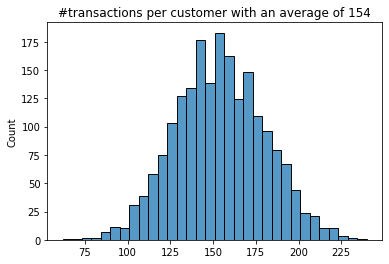

In [33]:
# How many transactions per customer within 49 weeks?
n_transactions_per_customer = [len(df[df.customer_id==i]) for i in df.customer_id.unique()]
sns.histplot(n_transactions_per_customer).set(
    title=f"""#transactions per customer with an average of {
        round(np.mean(n_transactions_per_customer))
        }"""
    );plt.show()

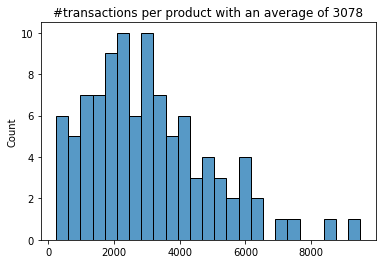

In [38]:
# How many transactions per product within 49 weeks?
n_transactions_per_product = [len(df[df.product_id==i]) for i in df.product_id.unique()]
sns.histplot(n_transactions_per_product, bins=25).set(
    title=f"""#transactions per product with an average of {
        round(np.mean(n_transactions_per_product))
        }"""
    );plt.show()

# Some products were bought far more often than others

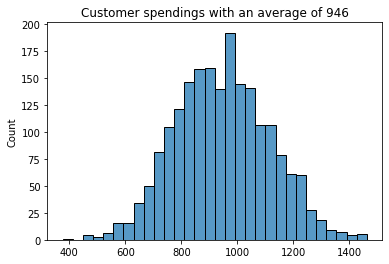

In [40]:
# How much did each customer spend within 49 weeks?
customer_spend = [df[df.customer_id==i].price.sum() for i in df.customer_id.unique()]
sns.histplot(customer_spend).set(
    title=f"""Customer spendings with an average of {
        round(np.mean(customer_spend))
        }"""
    );plt.show()
# Similar picture like n_transactions

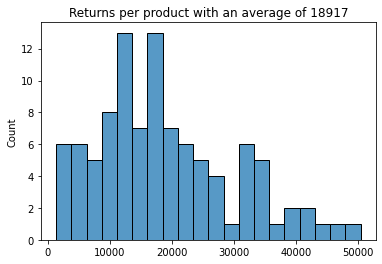

In [43]:
# How much return per product within 49 weeks?
returns_per_product = [df[df.product_id==i].price.sum() for i in df.product_id.unique()]
sns.histplot(returns_per_product, bins=20).set(
    title=f"""Returns per product with an average of {
        round(np.mean(returns_per_product))
        }"""
    );plt.show()

# Similar picture like transactions per product

In [39]:
# Customer Features (joins by id & id+week)
customer_static_features = {
    "customer_id" : [],
    "avg_n_transactions_weekly_customer": [],
    "avg_spending_weekly": [],
    "customer_segment": [],
}

customer_dynamic_features = {
    "customer_id": [],
    "week": [],
    "n_transactions_last_week_customer" : [],
    "sum_spending_last_week": []
}

# Product Features (joins by id & id+week)
product_static_features = {
    "product_id" : [],
    "avg_n_transactions_weekly_product": [],
    "avg_returns_weekly": [],
    "product_segment" : [],
   
}

product_dynamic_features = {
    "product_id" : [],
    "week" : [],
    "n_transactions_last_week_product" : [],
    "sum_returns_last_week": [],
    "price_delta_to_last_week": [] 
}